# Lab 2: Cluster analysis of sequential data

## About the dataset

In this lab, we are going to use the built-in `biofam` data set from the `TraMineR` package. See more details [here](http://traminer.unige.ch/doc/biofam.html)

This data consists information about the Family life states from the Swiss Household Panel biographical survey. 16 year-long family life sequences built from the retrospective biographical survey carried out by the Swiss Household Panel (SHP) in 2002.

A data frame with 2000 rows, 16 state variables, 1 id variable and 7 covariates and 2 weights variables.

The data set contains (in columns 10 to 25) sequences of family life states from age 15 to 30 (sequence length is 16) and a series of covariates. The sequences are a sample of 2000 sequences of those created from the SHP biographical survey. It includes only individuals who were at least 30 years old at the time of the survey. The biofam data set describes family life courses of 2000 individuals born between 1909 and 1972.

The states numbered from 0 to 7 are defined from the combination of five basic states, namely Living with parents (Parent), Left home (Left), Married (Marr), Having Children (Child), Divorced:

0 = "Parent"  
1 = "Left"  
2 = "Married"  
3 = "Left+Marr"  
4 = "Child"  
5 = "Left+Child"  
6 = "Left+Marr+Child"  
7 = "Divorced"  

| Variable | Label                                          |
|----------|------------------------------------------------|
| idhous   | ID                                             |
| sex      | sex                                            |
| birthy   | birth year                                     |
| nat102   | nationality                                    |
| plingu02 | interview language                             |
| p02r01   | confession or religion                         |
| p02r04   | participation in religious services: frequency |
| cspfaj   | Swiss socio-professional category: Fathers job |
| cspmoj   | Swiss socio-professional category: Mothers job |
| a15      | family status at age 15                        |
| ...      |                                                |
| a30      | family status at age 30                        |


In [2]:
library(tidyverse)
library(TraMineR)
library(cluster)
data(biofam)
str(biofam)

── Attaching packages ──────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

Warning message:
“package ‘tibble’ was built under R version 4.1.1”
Warning message:
“package ‘readr’ was built under R version 4.1.1”
── Conflicts ─────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘TraMineR’ was built under R version 4.1.1”

TraMineR stable version 2.2-3 (Built: 2022-01-26)

Website: http://traminer.unige.ch

Please type 'citation("TraMineR")' for citation information.


Warning message:
“package ‘cluster’ was built under R version 4.1.1”


'data.frame':	2000 obs. of  27 variables:
 $ idhous  : num  66891 28621 57711 17501 147701 ...
 $ sex     : Factor w/ 2 levels "man","woman": 1 1 2 1 1 1 1 1 1 2 ...
 $ birthyr : num  1943 1935 1946 1918 1946 ...
 $ nat_1_02: Factor w/ 200 levels "other error",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ plingu02: Factor w/ 3 levels "french","german",..: 2 2 1 2 2 3 2 1 1 2 ...
 $ p02r01  : Factor w/ 13 levels "other error",..: 6 7 13 7 7 7 6 9 6 7 ...
 $ p02r04  : Factor w/ 14 levels "other error",..: 9 13 7 13 7 6 7 14 9 13 ...
 $ cspfaj  : Factor w/ 12 levels "active occupied but not classified",..: 7 7 7 5 NA 12 NA 11 7 7 ...
 $ cspmoj  : Factor w/ 12 levels "active occupied but not classified",..: 7 NA 9 NA NA NA NA NA 7 NA ...
 $ a15     : num  0 0 0 0 0 0 0 0 0 1 ...
 $ a16     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ a17     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ a18     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ a19     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ a20     : num  0 1 0 1 1 0 0 0 0 1 ...
 $ a21     : num  0

In [3]:
# state labels
bfstates <- c("Parent", "Left", "Married", "Left+Marr", "Child", "Left+Child", "Left+Marr+Child", "Divorced")

# define sequence object
biofam.seq <- seqdef(biofam, 10:25, states = bfstates, labels = bfstates)


 [>] state coding:

       [alphabet]  [label]         [long label] 

     1  0           Parent          Parent

     2  1           Left            Left

     3  2           Married         Married

     4  3           Left+Marr       Left+Marr

     5  4           Child           Child

     6  5           Left+Child      Left+Child

     7  6           Left+Marr+Child Left+Marr+Child

     8  7           Divorced        Divorced

 [>] 2000 sequences in the data set

 [>] min/max sequence length: 16/16



## Q1. Create a normalized dissimilarity matrix using Longest Common Subsequences method

Store the dissimilarity matrix in `biofam.seq.LCS`

In [34]:
biofam.seq.LCS <- NULL

# BEGIN SOLUTION
biofam.seq.LCS <- seqdist(biofam.seq, method='LCS', norm = 'auto')
biofam.seq.LCS

# END SOLUTION

 [>] 2000 sequences with 8 distinct states

 [>] creating a 'sm' with a substitution cost of 2

 [>] creating 8x8 substitution-cost matrix using 2 as constant value

 [>] 537 distinct  sequences 

 [>] min/max sequence lengths: 16/16

 [>] computing distances using the LCS gmean normalized metric

 [>] elapsed time: 0.123 secs



,1167,514,1013,275,2580,773,1187,47,2091,1846,⋯,278,1980,787,1120,59,629,2297,775,2522,719
1167,0.0000,0.6250,0.3125,0.6875,0.5000,0.4375,0.4375,0.4375,0.1250,0.6250,⋯,0.4375,0.6875,0.4375,0.3750,0.4375,0.2500,0.5625,0.4375,0.8125,0.2500
514,0.6250,0.0000,0.3750,0.3125,0.2500,0.9375,0.9375,0.4375,0.6875,0.1875,⋯,0.9375,0.3125,0.8125,0.8750,0.9375,0.5000,0.2500,0.9375,0.9375,0.6875
1013,0.3125,0.3750,0.0000,0.3750,0.1875,0.5625,0.5625,0.1250,0.3750,0.5000,⋯,0.5625,0.3750,0.4375,0.5000,0.5625,0.2500,0.3125,0.5625,0.8125,0.4375
275,0.6875,0.3125,0.3750,0.0000,0.1875,0.6875,0.6875,0.3750,0.6875,0.4375,⋯,0.6875,0.0000,0.5625,0.6875,0.6875,0.5000,0.5000,0.6875,0.8125,0.6875
2580,0.5000,0.2500,0.1875,0.1875,0.0000,0.6875,0.6875,0.2500,0.5000,0.3125,⋯,0.6875,0.1875,0.5625,0.6250,0.6875,0.3125,0.3125,0.6875,0.8125,0.5000
773,0.4375,0.9375,0.5625,0.6875,0.6875,0.0000,0.4375,0.6250,0.3125,1.0000,⋯,0.0000,0.6875,0.1250,0.0625,0.1875,0.6250,0.8750,0.0000,0.8125,0.6250
1187,0.4375,0.9375,0.5625,0.6875,0.6875,0.4375,0.0000,0.6250,0.4375,1.0000,⋯,0.4375,0.6875,0.4375,0.4375,0.2500,0.6250,0.8750,0.4375,0.3750,0.6250
47,0.4375,0.4375,0.1250,0.3750,0.2500,0.6250,0.6250,0.0000,0.5000,0.5625,⋯,0.6250,0.3750,0.5000,0.5625,0.6250,0.3125,0.2500,0.6250,0.8125,0.5000
2091,0.1250,0.6875,0.3750,0.6875,0.5000,0.3125,0.4375,0.5000,0.0000,0.6875,⋯,0.3125,0.6875,0.3125,0.2500,0.3125,0.3125,0.6250,0.3125,0.8125,0.3125
1846,0.6250,0.1875,0.5000,0.4375,0.3125,1.0000,1.0000,0.5625,0.6875,0.0000,⋯,1.0000,0.4375,0.8750,0.9375,1.0000,0.3750,0.3750,1.0000,1.0000,0.5625


## Q2. Plot the pairs of sequences

- Plot the top 5 sequences that are the most similar to sequence 1
- Plot the top 5 sequences that are the least similar to sequence 1

In [55]:
most_sim <- head(which(biofam.seq.LCS==min(biofam.seq.LCS), arr.ind=T))
most_sim
least_sim <- head(which(biofam.seq.LCS==max(biofam.seq.LCS), arr.ind=T))
least_sim

,row,col
1167,1,1
1746,39,1
2577,284,1
478,767,1
480,805,1
2380,919,1


,row,col
2304,443,1
2395,602,1
909,872,1
821,1461,1
769,1546,1
1012,1723,1


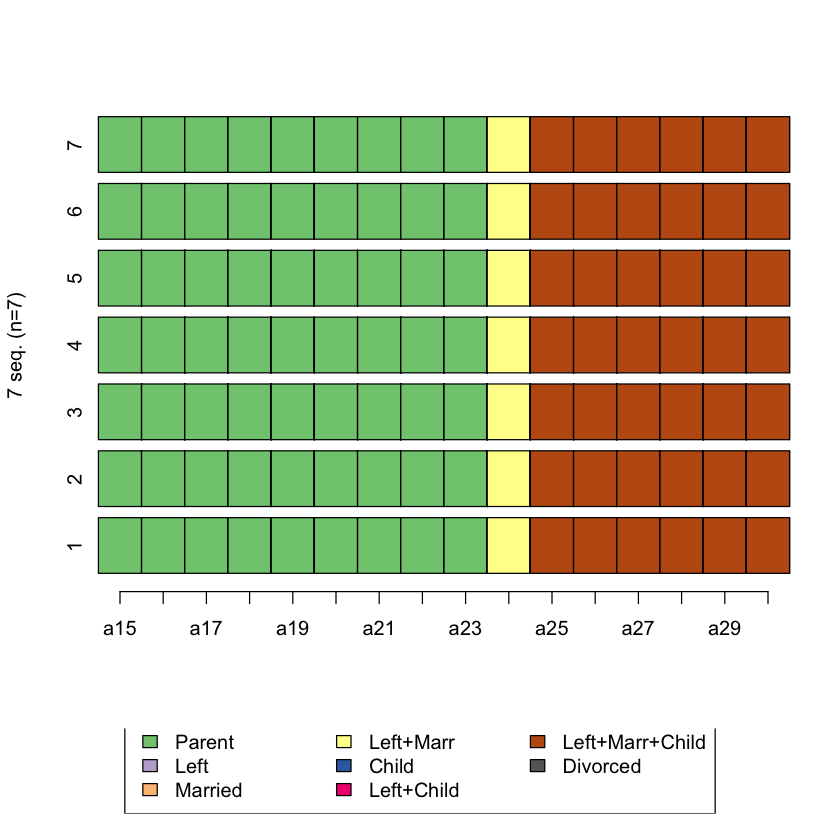

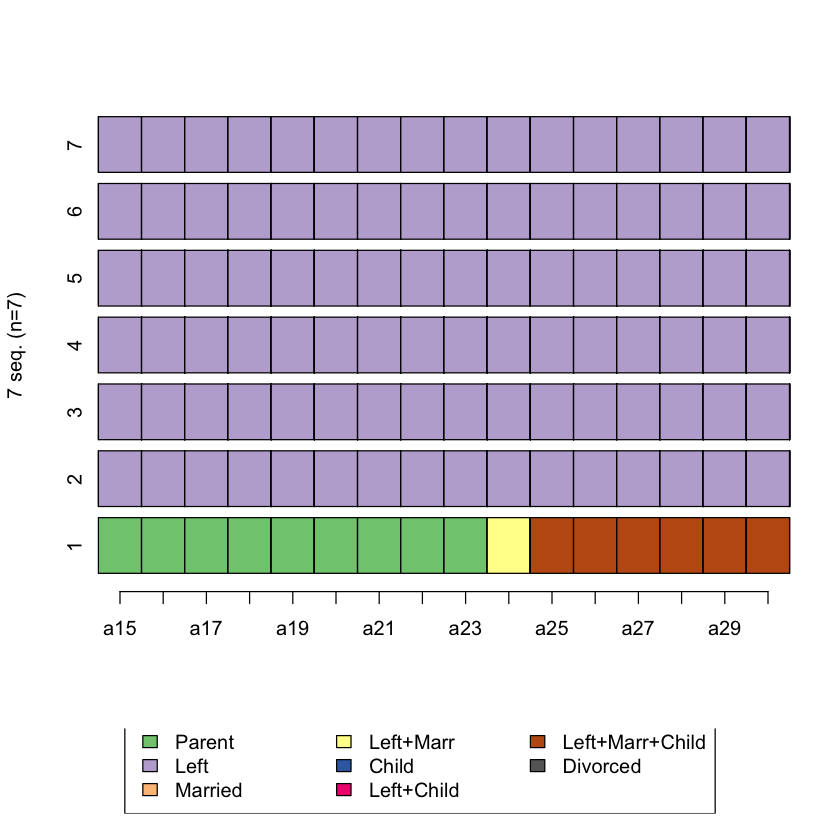

In [67]:
# BEGIN SOLUTION
seqiplot(biofam.seq[c(1,most_sim[,1]),])
seqiplot(biofam.seq[c(1,least_sim[,1]),])

# END SOLUTION

## Q3. Create a dissimilarity matrix using optimal matching using transition rates as substitution cost matrix

In [69]:
biofam.seq.subcost <- NULL
biofam.seq.OM <- NULL

# BEGIN SOLUTION
biofam.seq.subcost <- seqcost(biofam.seq, method = "TRATE")
biofam.seq.OM <- seqdist(biofam.seq, method='OM', sm=biofam.seq.subcost$sm)
biofam.seq.OM

# END SOLUTION

 [>] creating substitution-cost matrix using transition rates ...

 [>] computing transition probabilities for states Parent/Left/Married/Left+Marr/Child/Left+Child/Left+Marr+Child/Divorced ...

 [>] 2000 sequences with 8 distinct states

 [>] checking 'sm' (size and triangle inequality)

 [>] 537 distinct  sequences 

 [>] min/max sequence lengths: 16/16

 [>] computing distances using the OM metric

 [>] elapsed time: 0.127 secs



,1167,514,1013,275,2580,773,1187,47,2091,1846,⋯,278,1980,787,1120,59,629,2297,775,2522,719
1167,0.000000,19.563325,9.890831,21.562411,15.630326,13.901396,13.92295,13.437363,3.957049,19.309299,⋯,13.901396,21.562411,13.878381,11.912527,13.901428,7.636805,17.241790,13.901396,25.83089,7.767166
514,19.563325,0.000000,11.727078,9.916578,7.890831,29.377814,29.50852,13.328194,21.254715,5.777920,⋯,29.377814,9.916578,25.563325,27.388945,29.377846,15.482360,7.695148,29.377814,29.83603,21.414446
1013,9.890831,11.727078,0.000000,11.739494,5.807409,17.661866,17.84715,3.800558,11.559582,15.582221,⋯,17.661866,11.739494,13.836247,15.672997,17.661899,7.755282,9.945416,17.661866,25.89494,13.676236
275,21.562411,9.916578,11.739494,0.000000,5.932086,21.399572,21.78166,11.649872,21.559303,13.954724,⋯,21.399572,0.000000,17.508741,21.431519,21.563325,15.786949,15.643672,21.399572,25.96931,21.719034
2580,15.630326,7.890831,5.807409,5.932086,0.000000,21.529933,21.74830,7.579129,15.627218,9.945416,⋯,21.529933,5.932086,17.672494,19.541064,21.529966,9.854863,9.833155,21.529933,25.93595,15.786949
773,13.901396,29.377814,17.661866,21.399572,21.529933,0.000000,13.89259,19.609357,9.944347,31.430826,⋯,0.000000,21.399572,3.890831,1.988869,5.953968,19.758332,27.500692,0.000000,25.80053,19.888693
1187,13.922955,29.508520,17.847146,21.781663,21.748303,13.892592,0.00000,19.783030,13.913712,31.430901,⋯,13.892592,21.781663,13.923280,13.896816,7.938624,19.758407,27.565217,13.892592,11.90794,19.888768
47,13.437363,13.328194,3.800558,11.649872,7.579129,19.609357,19.78303,0.000000,15.128752,17.183336,⋯,19.609357,11.649872,15.836247,17.620488,19.630873,9.356397,7.945416,19.609357,25.90075,15.288483
2091,3.957049,21.254715,11.559582,21.559303,15.627218,9.944347,13.91371,15.128752,0.000000,21.486480,⋯,9.944347,21.559303,9.921332,7.955477,9.944379,9.813986,19.377592,9.944347,25.82165,9.944347
1846,19.309299,5.777920,15.582221,13.954724,9.945416,31.430826,31.43090,17.183336,21.486480,0.000000,⋯,31.430826,13.954724,27.617910,29.441957,31.430859,11.672494,11.209083,31.430826,31.75841,17.604580


## Q4. Perform an agglomerative clustering using ward linkage method

- You should use the dissimilarity matrix with optimal matching generated in Q3
- Plot the dendogram

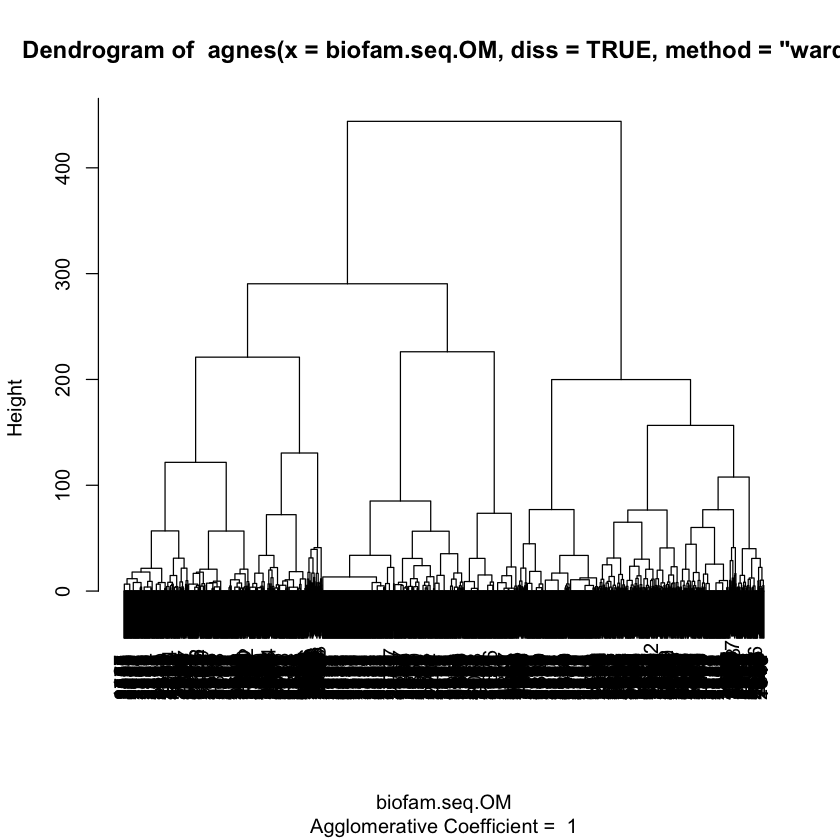

In [73]:
clusterward <- NULL

# BEGIN SOLUTION

clusterward <- agnes(biofam.seq.OM, diss = TRUE, method = "ward")

# Run this to generate the dendogram
plot(clusterward, which.plot=2)

# END SOLUTION

## Q5: Select clusters

- Cut the dendogram tree as appropriate using the `cutree()` function
- List the number of observations in each cluster
- Plot the sequence frequency by cluster membership (hint: `seqfplot()`)
- Plot the state distribution by cluster membership (hint: `seqdplot()`)

cluster5
  1   2   3   4   5 
392 770 442 168 228 

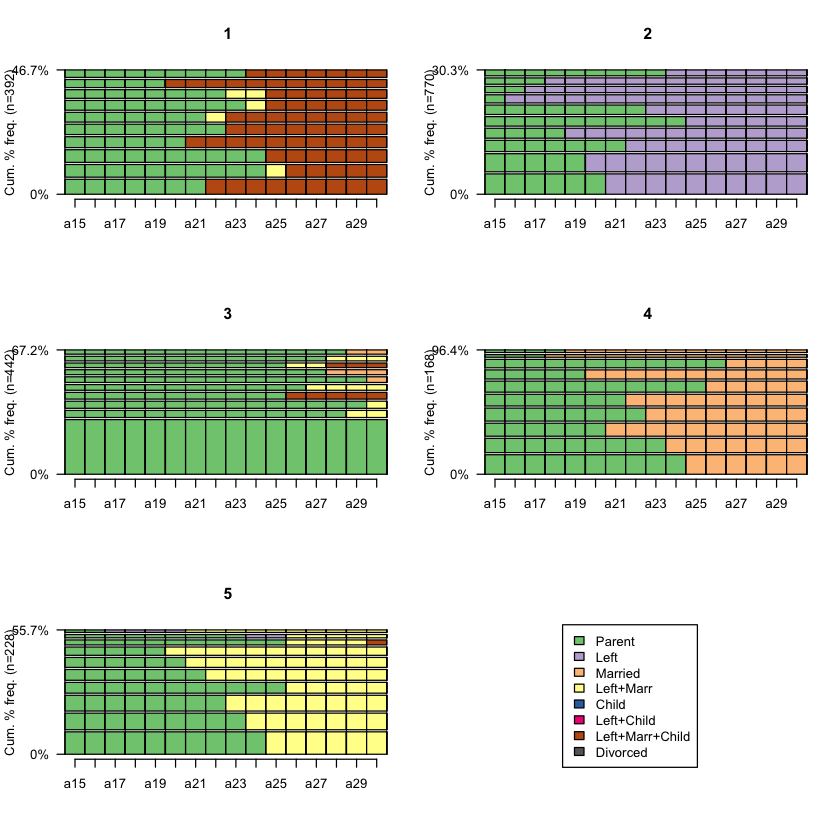

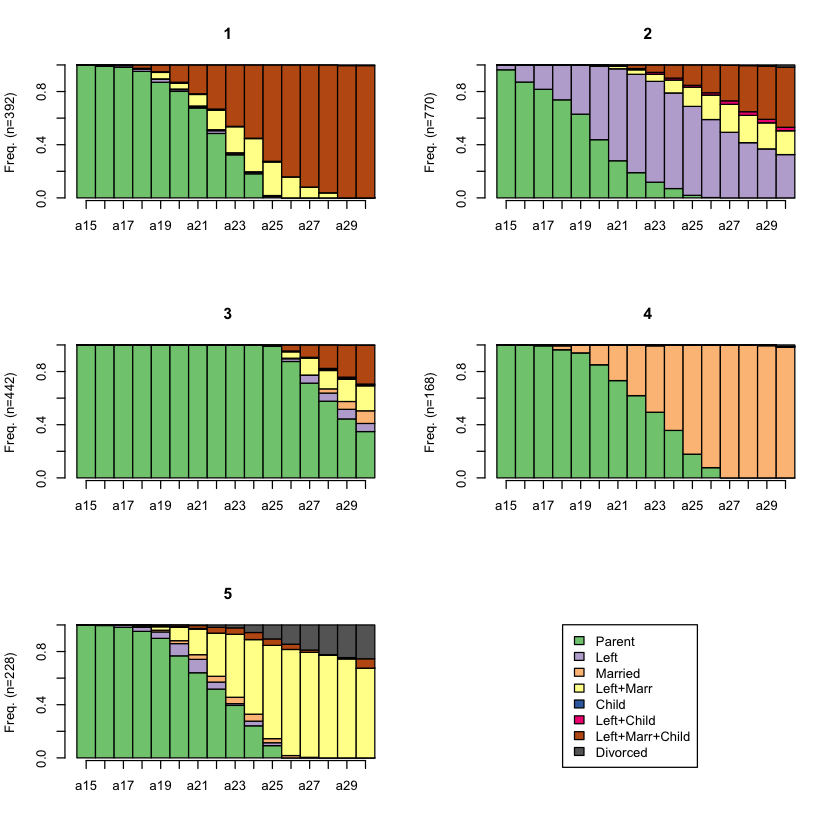

In [81]:
# BEGIN SOLUTION

# cut the dendogram tree to generate two clusters
cluster5 <- cutree(clusterward, k = 5)

# check the number of observations in each cluster
table(cluster5)

# plot sequence frequency by cluster membership
seqfplot(biofam.seq, group = cluster5, pbarw = T)

# plot state distribution by cluster membership
seqdplot(biofam.seq, group = cluster5)

# END SOLUTION